In [2]:
import pandas as pd
import matplotlib 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW
from scipy.stats import norm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.stats import stattools

In [4]:
nfl = pd.read_csv("NFL_Draft_History.csv")
nfl

,Unnamed: 0,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,...,Yds.1,TD.1,Rec,Yds.2,TD.2,Tkl,Int.1,Sk,College/Univ,Year
0,0,1,1,PIT,Terry Bradshaw,QB,22.0,1983.0,1,3,...,2257.0,32.0,0.0,1.0,0.0,NaN,NaN,NaN,Louisiana Tech,1970
1,1,1,2,GNB,Mike McCoy,DT,22.0,1980.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Notre Dame,1970
2,2,1,3,CLE,Mike Phipps,QB,22.0,1981.0,0,0,...,1278.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,Purdue,1970
3,3,1,4,BOS,Phil Olsen,DT,22.0,1976.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utah St.,1970
4,4,1,5,BUF,Al Cowlings,DE,23.0,1979.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USC,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14491,248,7,249,SFO,Prince Charles Iworah,CB,23.0,2016.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West. Kentucky,2016
14492,249,7,250,CLE,Scooby Wright,ILB,22.0,2016.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona,2016
14493,250,7,251,PHI,Joe Walker,ILB,23.0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oregon,2016
14494,251,7,252,CAR,Beau Sandland,TE,23.0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Montana St.,2016


In [5]:
nfl.columns

Index(['Unnamed: 0', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'Age', 'To', 'AP1',
       'PB', 'St', 'CarAV', 'DrAV', 'G', 'Cmp', 'Att', 'Yds', 'TD', 'Int',
       'Att.1', 'Yds.1', 'TD.1', 'Rec', 'Yds.2', 'TD.2', 'Tkl', 'Int.1', 'Sk',
       'College/Univ', 'Year'],
      dtype='object')

In [6]:
nfl = nfl.drop(['Unnamed: 0', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos', 'To', 'AP1',
       'PB', 'St', 'CarAV', 'DrAV', 'G', 'Cmp', 'Att', 'Yds', 'TD', 'Int',
       'Att.1', 'Yds.1', 'TD.1', 'Rec', 'Yds.2', 'TD.2', 'Tkl', 'Int.1', 'Sk',
       'College/Univ'], axis=1)
nfl

,Age,Year
0,22.0,1970
1,22.0,1970
2,22.0,1970
3,22.0,1970
4,23.0,1970
...,...,...
14491,23.0,2016
14492,22.0,2016
14493,23.0,2016
14494,23.0,2016


#### Mean, Max, Min

In [8]:
age_num = nfl['Age'].mean()
age_num

22.54635823114084

In [9]:
age_min = nfl['Age'].min()
age_min

20.0

In [10]:
year_min = nfl['Year'].min()
year_min

1970

In [11]:
age_max = nfl['Age'].max()
age_max

29.0

In [13]:
year_max = nfl['Year'].max()
year_max

2016

#### Range

In [14]:
age_range = age_max - age_min
age_range

9.0

In [15]:
year_range = year_max - year_min
year_range

46

#### Mean

In [16]:
age_mean = nfl['Age'].mean()
age_mean

22.54635823114084

In [17]:
year_mean = nfl['Year'].mean()
year_mean

1990.3854856512141

#### Median

In [18]:
age_median = nfl['Age'].median()
age_median

23.0

In [19]:
year_median = nfl['Year'].median()
year_median

1989.0

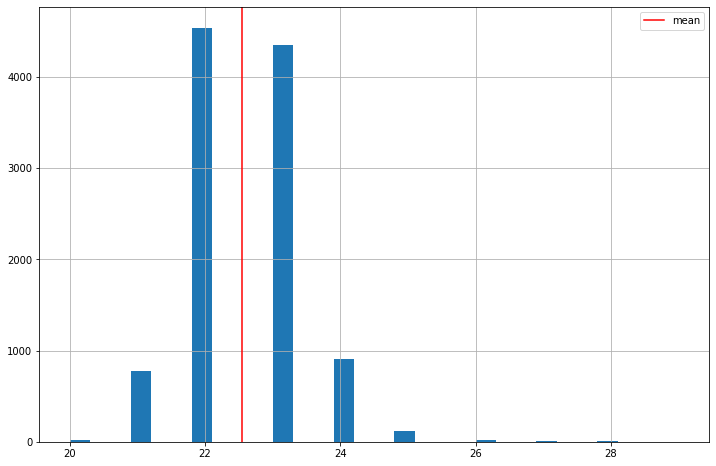

In [20]:
plt.figure(figsize=(12,8))
nfl['Age'].hist(bins=30)
plt.axvline(age_mean, color='r', label='mean')
plt.legend()

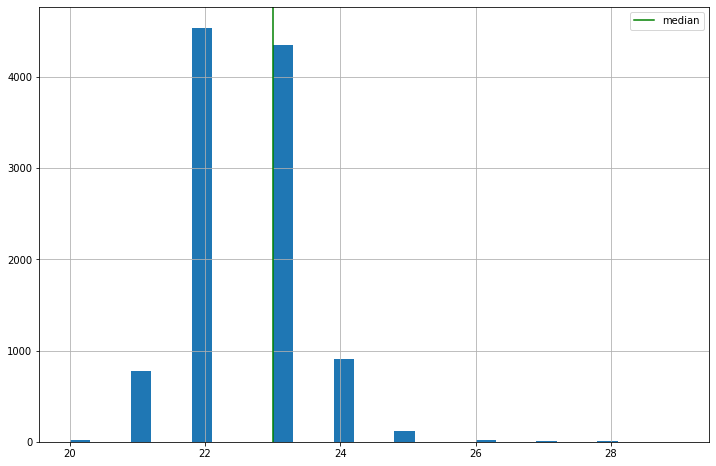

In [21]:
plt.figure(figsize=(12,8))
nfl['Age'].hist(bins=30)
plt.axvline(age_median, color='g', label='median')
plt.legend()

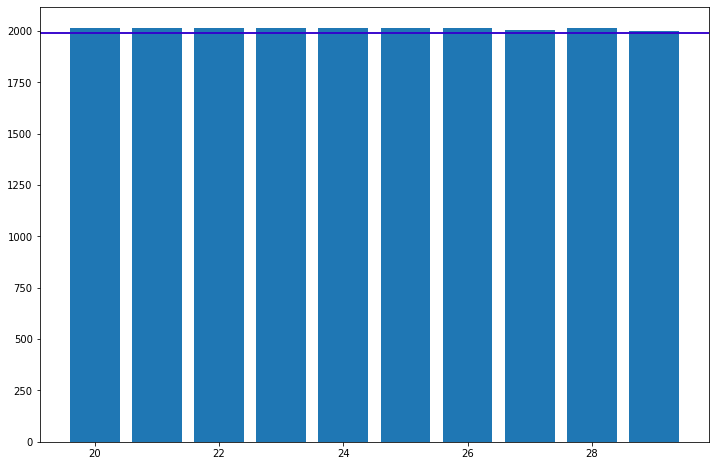

In [22]:
plt.figure(figsize=(12,8))
plt.bar(nfl['Age'], nfl['Year'])

plt.axhline(year_mean, color='r', label='mean')
plt.axhline(year_median, color='b', label='median')

plt.show()

#### Interquartile Range

In [23]:
q1_age = nfl['Age'].quantile(.25)
q1_age

22.0

In [24]:
q3_age = nfl['Age'].quantile(.75)
q3_age

23.0

In [25]:
iqr_age = q3_age = q1_age
iqr_age

22.0

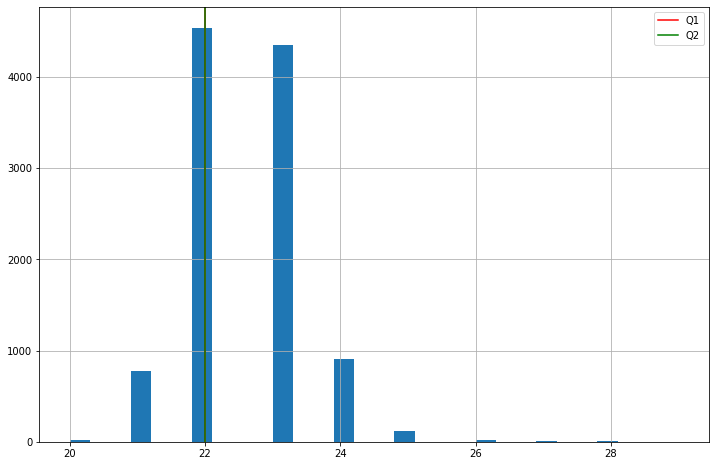

In [26]:
plt.figure(figsize=(12,8))

nfl['Age'].hist(bins=30)
plt.axvline(q1_age, color='r', label='Q1')
plt.axvline(q3_age, color='g', label='Q2')
plt.legend()

#### Calculating Variance

In [27]:
nfl['Age'].var()

0.7040664538382162

In [28]:
nfl['Year'].var()

190.64283588692757

#### Standard Deviation

In [29]:
nfl['Age'].std()

0.8390866783820466

In [30]:
nfl['Year'].std()

13.807347170507722

In [31]:
nfl.describe()

,Age,Year
count,10764.000000,14496.000000
mean,22.546358,1990.385486
std,0.839087,13.807347
min,20.000000,1970.000000
25%,22.000000,1978.000000
50%,23.000000,1989.000000
75%,23.000000,2002.000000
max,29.000000,2016.000000


#### Univariate Analysis

C:\Users\molly\Desktop\devMountain\specializations\week-11\stats-report\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


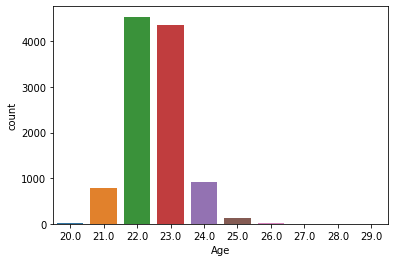

In [32]:
sns.countplot(nfl['Age'])
plt.show()

C:\Users\molly\Desktop\devMountain\specializations\week-11\stats-report\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


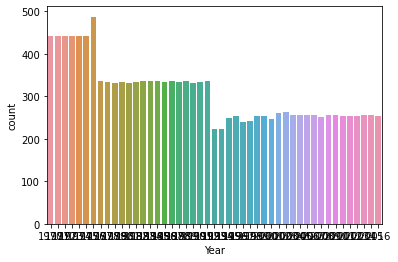

In [33]:
sns.countplot(nfl['Year'])
plt.show()

#### Considering only Age

In [34]:
age = nfl['Age']

#### Histogram-plot

<AxesSubplot:title={'center':'Age Histogram'}, ylabel='Frequency'>

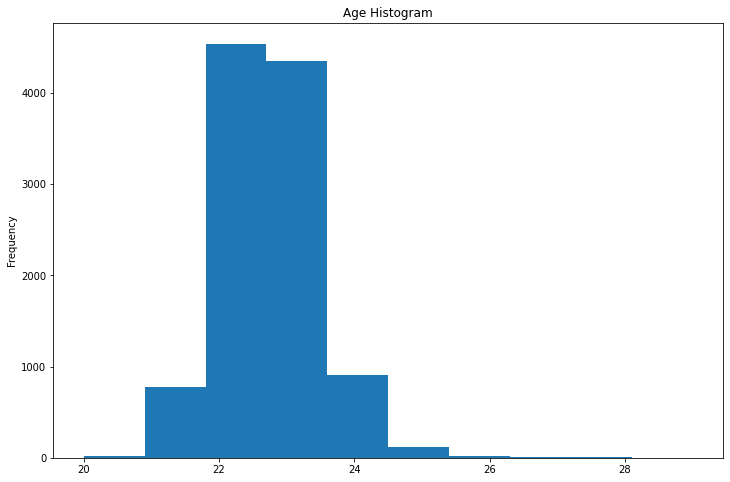

In [35]:
plt.figure(figsize=(12,8))
age.plot(kind='hist',
        title='Age Histogram')

#### Box-plot

<AxesSubplot:title={'center':'Age Box-plot'}>

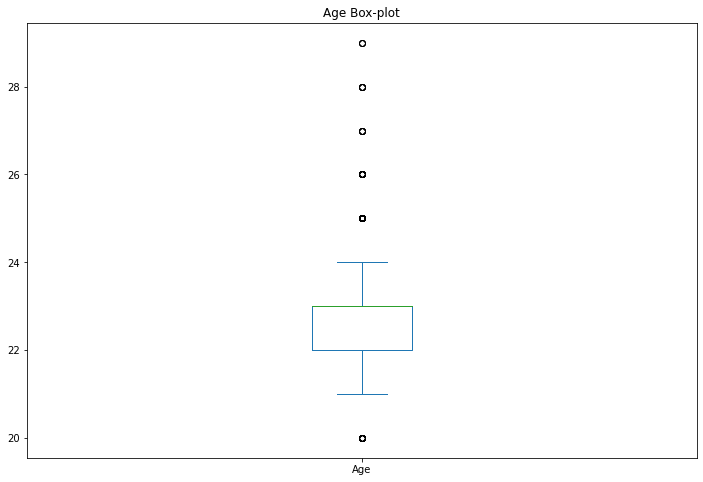

In [36]:
plt.figure(figsize=(12,8))
age.plot(kind='box',
        title='Age Box-plot')

#### KDE distribution for Age

<AxesSubplot:title={'center':'Age KDE'}, ylabel='Density'>

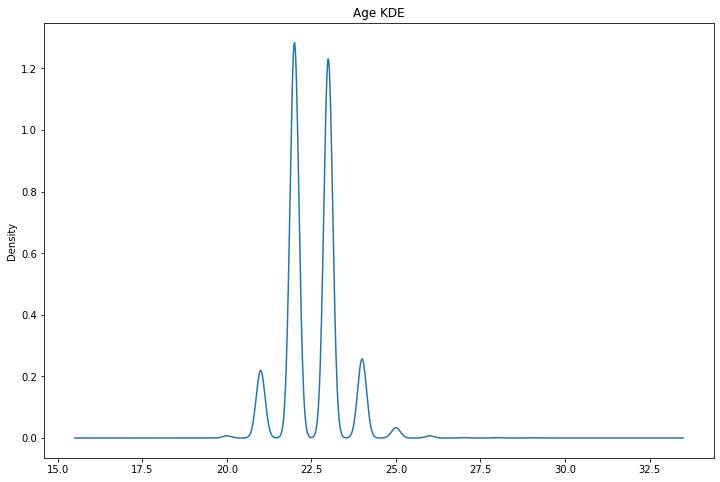

In [37]:
age.plot(kind='kde',
        title='Age KDE', figsize=(12,8))

#### Skewness and Kurtosis

In [38]:
nfl['Age'].skew()

0.632781878249283

In [39]:
nfl['Year'].kurtosis()

-1.1797074347030039

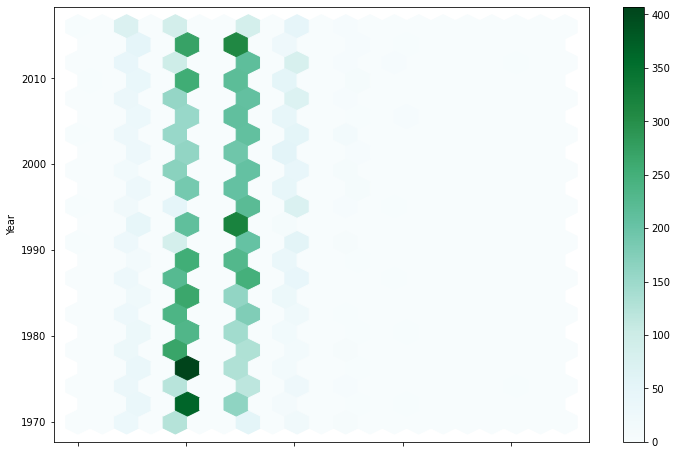

In [40]:
nfl.plot.hexbin(x='Age', y='Year', gridsize=20, figsize=(12,8))
plt.show()

#### Covariance

In [42]:
nfl_cov = nfl.cov()
nfl_cov

,Age,Year
Age,0.704066,1.351919
Year,1.351919,190.642836


#### Correlation

In [43]:
nfl_corr = nfl.corr()
nfl_corr

,Age,Year
Age,1.000000,0.118217
Year,0.118217,1.000000


<AxesSubplot:>

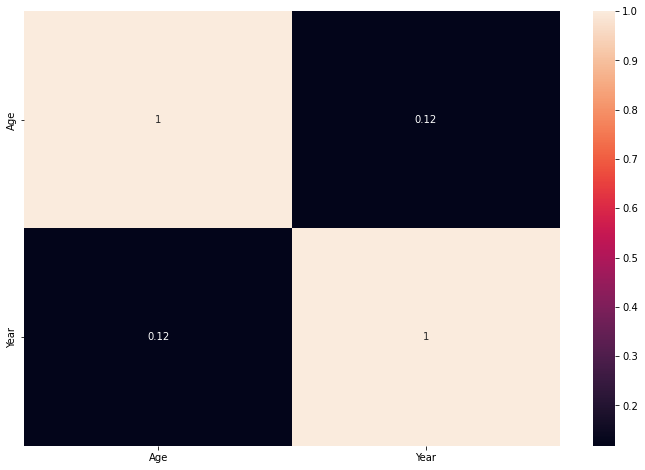

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(nfl_corr, annot=True)

#### Skewness and Kurtosis with scipy

In [45]:
stats.skew(nfl['Age'])

nan

In [46]:
stats.kurtosis(nfl['Age'])

nan

In [47]:
stats.skew(nfl['Year'])

0.24741464114317485

In [49]:
stats.kurtosis(nfl['Year'])

-1.1797144448155017

# Questions:

1. What is the median age of NFL football players?
    23.0
2. What are the year ranges of the NFL data set?
    1970-2016